# AA228 Final Project: Lunar Lander
#### Kapil Dheeriya, Cole Robins, Ashley Davidson
Fall 2024

In [ ]:
import numpy as np
import gymnasium as gym
from IPython import display
import matplotlib
import matplotlib.pyplot as plt
import collections
%matplotlib inline
#import torch
#run pip install gym and pip install gym[box2d] in terminal
seed_num = 42

Random Lunar Lander

In [10]:
env = gym.make("LunarLander-v2", render_mode='rgb_array')
env.action_space.seed(seed_num)
def ll_random(env, num_iter, max_steps=1000, render=False):
    #List of total rewards over iterations
    rewards = []

    for i in range(num_iter):
        #Reset env
        obs, info = env.reset()
        iter_reward = 0
        num_steps = 0

        #Take steps until termination condition
        while num_steps < max_steps:
            #Take a step
            observation, reward, terminated, truncated, info = env.step(env.action_space.sample())
            #Add R(s,a) to cumulative reward over an iteration
            iter_reward += reward
            #if render: env.render()
            if terminated or truncated:
                rewards.append(iter_reward)
                break
    
    return np.array(rewards)

random_trials_rewards = ll_random(env, num_iter=1000)
random_trials_mean = np.mean(random_trials_rewards)

/Users/colerobins/opt/anaconda3/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


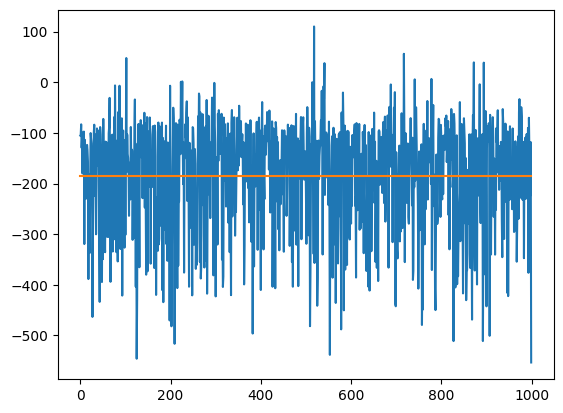

In [12]:
plt.plot(random_trials_rewards)
plt.plot([random_trials_mean] * len(random_trials_rewards))

In [14]:
def discretize(s):
    return ((s[0] + 1.5)*(10/3) // 10,
            (s[1] + 1.5)*(10/3) // 10,
            (s[2] + 5)// 10,
            (s[3] + 5)// 10,
            (10*s[4]/np.pi + 10)//10,
            (s[5] + 5)//10,
            int(s[6]),
            int(s[7]))

def epsilon_greedy(disc_state, Q, eps=0.15):
    if np.random.rand() < eps:
        return np.random.randint(0,4)
    else:
        #if Qs haven't been initialized for this state, choose to do nothing (argmax=0)
        return np.argmax(np.array([Q[disc_state+(i,)] for i in range(4)]))


def sarsa(env, alpha, num_iter, max_steps=1000):
    Q = collections.defaultdict(float)
    gamma = 0.95
    rewards = []

    for i in range(num_iter):
        obs, info = env.reset()
        d_state = discretize(obs)

        iter_reward = 0
        num_steps = 0

        #first action
        action = epsilon_greedy(d_state, Q)
        #Take steps until termination condition
        while num_steps < max_steps:
            #Take a step
            observation, reward, terminated, truncated, info = env.step(action)
            #Add R(s,a) to cumulative reward over an iteration
            iter_reward += reward
            next_state = discretize(observation)
            next_act = epsilon_greedy(next_state, Q)
            #if render: env.render()

            #Update Q value according to next state and action
            if not terminated:
                Q[d_state + (action,)] += alpha*(reward + gamma*Q[next_state+(next_act,)] - Q[d_state + (action,)])
            else:
                Q[d_state + (action,)] += alpha*(reward - Q[d_state + (action,)])
                rewards.append(iter_reward)
                break

            #update current state and action
            d_state = next_state
            action = next_act
            num_steps += 1
    return rewards, Q



In [16]:
sarsa_rewards, sarsa_Q = sarsa(env, 1E-2, 1000)
sarsa_rewards_mean = np.mean(sarsa_rewards)

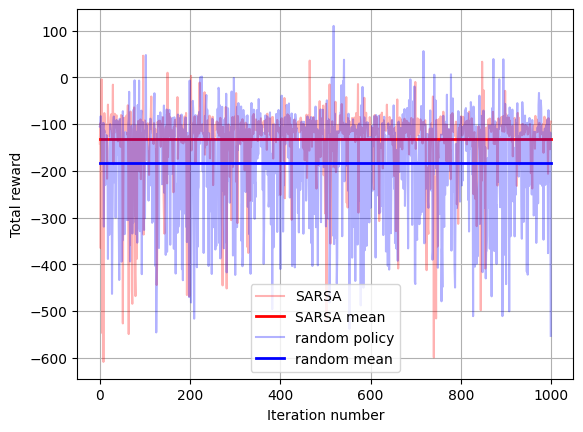

In [18]:
plt.plot(sarsa_rewards, label='SARSA', color='r', alpha=0.3)
plt.plot([sarsa_rewards_mean] * len(sarsa_rewards), label='SARSA mean', lw=2, color='r', alpha=1)
plt.plot(random_trials_rewards, label='random policy', color='b',alpha=0.3)
plt.plot([random_trials_mean] * len(random_trials_rewards), label='random mean', lw=2, color='b')
plt.grid()
plt.xlabel('Iteration number')
plt.ylabel('Total reward')
plt.legend()

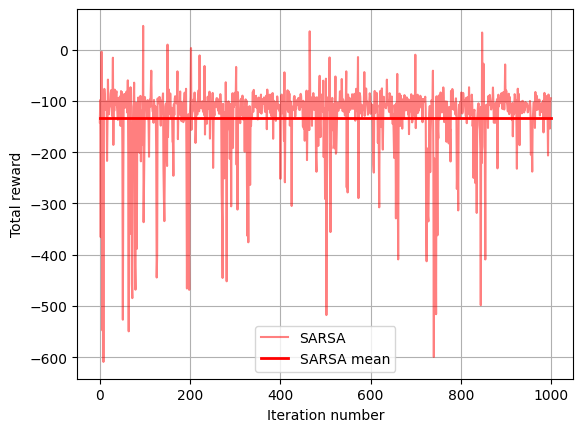

In [20]:
plt.plot(sarsa_rewards, label='SARSA', color='r', alpha=0.5)
plt.plot([sarsa_rewards_mean] * len(sarsa_rewards), label='SARSA mean', lw=2, color='r', alpha=1)
#plt.plot(random_trials_rewards, label='random policy', color='b',alpha=0.3)
#plt.plot([random_trials_mean] * len(random_trials_rewards), label='random mean', lw=2, color='b')
plt.grid()
plt.xlabel('Iteration number')
plt.ylabel('Total reward')
plt.legend()

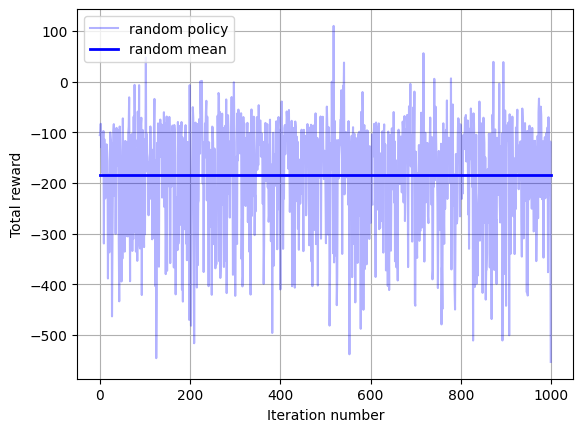

In [22]:
#plt.plot(sarsa_rewards, label='SARSA', color='r', alpha=0.5)
#plt.plot([sarsa_rewards_mean] * len(sarsa_rewards), label='SARSA mean', lw=2, color='r', alpha=1)
plt.plot(random_trials_rewards, label='random policy', color='b',alpha=0.3)
plt.plot([random_trials_mean] * len(random_trials_rewards), label='random mean', lw=2, color='b')
plt.grid()
plt.xlabel('Iteration number')
plt.ylabel('Total reward')
plt.legend()

In [ ]:
env_no_wind = gym.make("LunarLander-v3", continuous=False, gravity=-10.0,
               enable_wind=False, wind_power=15.0, turbulence_power=1.5)
env_wind15 = gym.make("LunarLander-v3", continuous=False, gravity=-10.0,
               enable_wind=True, wind_power=15.0, turbulence_power=1.5)
env_wind5 = gym.make("LunarLander-v3", continuous=False, gravity=-10.0,
               enable_wind=True, wind_power=5.0, turbulence_power=0.5)
env_wind10 = gym.make("LunarLander-v3", continuous=False, gravity=-10.0,
               enable_wind=True, wind_power=10.0, turbulence_power=1.0)
env_wind20 = gym.make("LunarLander-v3", continuous=False, gravity=-10.0,
               enable_wind=True, wind_power=20.0, turbulence_power=2.0)

env_wind5.action_space.seed(seed_num) 
env_wind15.action_space.seed(seed_num) 
env_wind20.action_space.seed(seed_num) 
env_wind10.action_space.seed(seed_num) 
env_no_wind.action_space.seed(seed_num) 

envs = [env_no_wind, env_wind5, env_wind10, env_wind15, env_wind20]

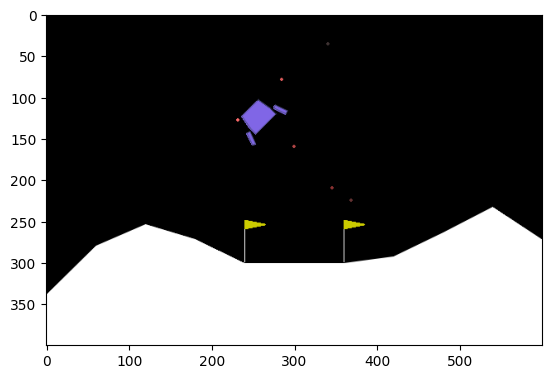

In [26]:
env = gym.make("LunarLander-v2", render_mode='rgb_array')
env.action_space.seed(seed_num)

observation, info = env.reset(seed=seed_num)
img = plt.imshow(env.render())
for _ in range(1000):
    img.set_data(env.render()) # just update the data
    display.display(plt.gcf())
    display.clear_output(wait=True)
    observation, reward, terminated, truncated, info = env.step(env.action_space.sample())
    if terminated or truncated:
        observation, info = env.reset()
env.close()

In [28]:
import torch
import torch.nn as nn
import torch.optim as optim
from collections import deque
import random

# Neural Network for Q-function approximation
class DQN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(DQN, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, output_dim)
        )
    
    def forward(self, x):
        return self.fc(x)

# Replay buffer to store experiences
class ReplayBuffer:
    def __init__(self, capacity):
        self.buffer = deque(maxlen=capacity)
    
    def add(self, state, action, reward, next_state, done):
        self.buffer.append((state, action, reward, next_state, done))
    
    def sample(self, batch_size):
        return random.sample(self.buffer, batch_size)
    
    def __len__(self):
        return len(self.buffer)

# Deep Q-Learning function
def train_dqn(env, episodes, gamma=0.99, lr=1e-3, batch_size=64, buffer_capacity=100000, epsilon_start=1.0, epsilon_min=0.1, epsilon_decay=0.995):
    input_dim = env.observation_space.shape[0]
    output_dim = env.action_space.n
    dqn = DQN(input_dim, output_dim).to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))
    optimizer = optim.Adam(dqn.parameters(), lr=lr)
    criterion = nn.MSELoss()
    buffer = ReplayBuffer(buffer_capacity)
    epsilon = epsilon_start

    rewards = []  # Initialize as a Python list
    for episode in range(episodes):
        state, _ = env.reset()
        state = torch.tensor(state, dtype=torch.float32).unsqueeze(0)
        total_reward = 0
    
        for t in range(1000):  # max steps per episode
            # Epsilon-greedy action selection
            if random.random() < epsilon:
                action = env.action_space.sample()
            else:
                with torch.no_grad():
                    action = torch.argmax(dqn(state)).item()
            
            # Take action
            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            next_state = torch.tensor(next_state, dtype=torch.float32).unsqueeze(0)
            buffer.add(state, action, reward, next_state, done)
    
            state = next_state
            total_reward += reward
    
            # Train the DQN
            if len(buffer) >= batch_size:
                batch = buffer.sample(batch_size)
                states, actions, rewards_batch, next_states, dones = zip(*batch)
    
                states = torch.cat(states).float()
                actions = torch.tensor(actions).unsqueeze(1)
                rewards_batch = torch.tensor(rewards_batch, dtype=torch.float32).unsqueeze(1)
                next_states = torch.cat(next_states).float()
                dones = torch.tensor(dones, dtype=torch.float32).unsqueeze(1)
    
                q_values = dqn(states).gather(1, actions)
                with torch.no_grad():
                    max_next_q_values = dqn(next_states).max(1, keepdim=True)[0]
                    target_q_values = rewards_batch + gamma * max_next_q_values * (1 - dones)
    
                loss = criterion(q_values, target_q_values)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
            
            if done:
                break
    
        rewards.append(total_reward)  # Append total_reward to Python list
        epsilon = max(epsilon * epsilon_decay, epsilon_min)
        print(f"Episode {episode+1}, Reward: {total_reward}, Epsilon: {epsilon}")
    
    return rewards, dqn

In [30]:
dqn_rewards, trained_dqn = train_dqn(env, episodes=1000)


Episode 1, Reward: -134.56003512672166, Epsilon: 0.995
Episode 2, Reward: -335.42845545947256, Epsilon: 0.990025
Episode 3, Reward: -98.32725224312259, Epsilon: 0.985074875
Episode 4, Reward: -107.09563240503606, Epsilon: 0.9801495006250001
Episode 5, Reward: -123.52901409857529, Epsilon: 0.9752487531218751
Episode 6, Reward: -106.34274089854955, Epsilon: 0.9703725093562657
Episode 7, Reward: -70.7990642107753, Epsilon: 0.9655206468094844
Episode 8, Reward: -449.43819847657693, Epsilon: 0.960693043575437
Episode 9, Reward: -154.44560019639704, Epsilon: 0.9558895783575597
Episode 10, Reward: -86.11946118853578, Epsilon: 0.9511101304657719
Episode 11, Reward: -139.69915055434413, Epsilon: 0.946354579813443
Episode 12, Reward: -102.94217915313807, Epsilon: 0.9416228069143757
Episode 13, Reward: -160.15208924629133, Epsilon: 0.9369146928798039
Episode 14, Reward: -62.59065612734297, Epsilon: 0.9322301194154049
Episode 15, Reward: -104.74126428645384, Epsilon: 0.9275689688183278
Episode 16,

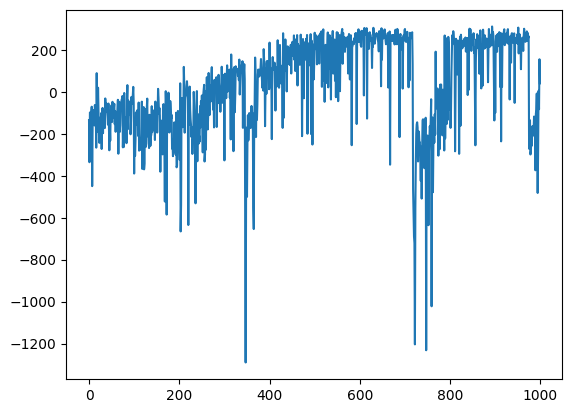

In [32]:
plt.plot(dqn_rewards)

In [34]:
# handle dd
def train_ddqn(env, episodes, gamma=0.99, lr=1e-3, batch_size=64, buffer_capacity=100000, 
               epsilon_start=1.0, epsilon_min=0.1, epsilon_decay=0.995, target_update_freq=10):
    input_dim = env.observation_space.shape[0]
    output_dim = env.action_space.n
    
    # Initialize both the Q-network and the Target network
    q_network = DQN(input_dim, output_dim).to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))
    target_network = DQN(input_dim, output_dim).to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))
    target_network.load_state_dict(q_network.state_dict())  # Initialize target with Q-network weights
    target_network.eval()  # Target network in evaluation mode
    
    optimizer = optim.Adam(q_network.parameters(), lr=lr)
    criterion = nn.MSELoss()
    buffer = ReplayBuffer(buffer_capacity)
    epsilon = epsilon_start

    rewards = []
    for episode in range(episodes):
        state, _ = env.reset()
        state = torch.tensor(state, dtype=torch.float32).unsqueeze(0)
        total_reward = 0

        for t in range(1000):  # max steps per episode
            # Epsilon-greedy action selection
            if random.random() < epsilon:
                action = env.action_space.sample()
            else:
                with torch.no_grad():
                    action = torch.argmax(q_network(state)).item()
            
            # Take action
            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            next_state = torch.tensor(next_state, dtype=torch.float32).unsqueeze(0)
            buffer.add(state, action, reward, next_state, done)

            state = next_state
            total_reward += reward

            # Train the Q-network
            if len(buffer) >= batch_size:
                batch = buffer.sample(batch_size)
                states, actions, rewards_batch, next_states, dones = zip(*batch)

                states = torch.cat(states).float()
                actions = torch.tensor(actions).unsqueeze(1)
                rewards_batch = torch.tensor(rewards_batch, dtype=torch.float32).unsqueeze(1)
                next_states = torch.cat(next_states).float()
                dones = torch.tensor(dones, dtype=torch.float32).unsqueeze(1)

                # Q-values for chosen actions
                q_values = q_network(states).gather(1, actions)

                
                with torch.no_grad():
                    # ddqn adjustments
                    next_actions = torch.argmax(q_network(next_states), dim=1, keepdim=True)
                    next_q_values = target_network(next_states).gather(1, next_actions)
                    target_q_values = rewards_batch + gamma * next_q_values * (1 - dones)

                loss = criterion(q_values, target_q_values)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

            if done:
                break

        rewards.append(total_reward)
        epsilon = max(epsilon * epsilon_decay, epsilon_min)
        print(f"Episode {episode+1}, Reward: {total_reward}, Epsilon: {epsilon}")

        # Update target network periodically
        if episode % target_update_freq == 0:
            target_network.load_state_dict(q_network.state_dict())

    return rewards, q_network


In [36]:
ddqn_rewards, trained_ddqn = train_ddqn(env, episodes=1000)

Episode 1, Reward: -115.28558802921759, Epsilon: 0.995
Episode 2, Reward: -142.03408262136074, Epsilon: 0.990025
Episode 3, Reward: -231.07921956421148, Epsilon: 0.985074875
Episode 4, Reward: -279.42588426629834, Epsilon: 0.9801495006250001
Episode 5, Reward: -130.52529446737037, Epsilon: 0.9752487531218751
Episode 6, Reward: -90.16033230746156, Epsilon: 0.9703725093562657
Episode 7, Reward: -187.88153430148168, Epsilon: 0.9655206468094844
Episode 8, Reward: -43.51263416167618, Epsilon: 0.960693043575437
Episode 9, Reward: -125.16305947996759, Epsilon: 0.9558895783575597
Episode 10, Reward: -132.77127300785955, Epsilon: 0.9511101304657719
Episode 11, Reward: -164.6116076339577, Epsilon: 0.946354579813443
Episode 12, Reward: -217.78416977140034, Epsilon: 0.9416228069143757
Episode 13, Reward: -156.73076359642636, Epsilon: 0.9369146928798039
Episode 14, Reward: -49.9884405747056, Epsilon: 0.9322301194154049
Episode 15, Reward: -247.33428093495505, Epsilon: 0.9275689688183278
Episode 16,

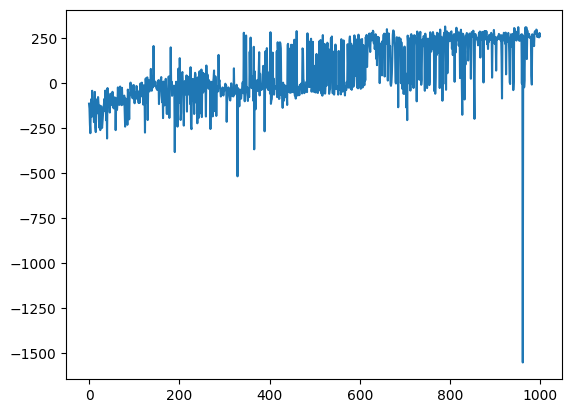

In [38]:
plt.plot(ddqn_rewards)

In [40]:
# Dueling dqn architechure
class DuelingDQN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(DuelingDQN, self).__init__()
        self.feature_layer = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU()
        )
        # Value stream
        self.value_stream = nn.Sequential(
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, 1)  # Single output for V(s)
        )
        # Advantage stream
        self.advantage_stream = nn.Sequential(
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, output_dim)  # Outputs for A(s, a)
        )
    
    def forward(self, x):
        features = self.feature_layer(x)
        value = self.value_stream(features)
        advantage = self.advantage_stream(features)
        # Combine value and advantage streams
        q_values = value + (advantage - advantage.mean(dim=1, keepdim=True))
        return q_values

In [42]:
# literally vanilla but with dueling architecture
def train_dueling_dqn(env, episodes, gamma=0.99, lr=1e-3, batch_size=64, buffer_capacity=100000, epsilon_start=1.0, epsilon_min=0.1, epsilon_decay=0.995):
    input_dim = env.observation_space.shape[0]
    output_dim = env.action_space.n
    dqn = DuelingDQN(input_dim, output_dim).to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))
    optimizer = optim.Adam(dqn.parameters(), lr=lr)
    criterion = nn.MSELoss()
    buffer = ReplayBuffer(buffer_capacity)
    epsilon = epsilon_start

    rewards = []  # Initialize as a Python list
    for episode in range(episodes):
        state, _ = env.reset()
        state = torch.tensor(state, dtype=torch.float32).unsqueeze(0)
        total_reward = 0
    
        for t in range(1000):  # max steps per episode
            # Epsilon-greedy action selection
            if random.random() < epsilon:
                action = env.action_space.sample()
            else:
                with torch.no_grad():
                    action = torch.argmax(dqn(state)).item()
            
            # Take action
            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            next_state = torch.tensor(next_state, dtype=torch.float32).unsqueeze(0)
            buffer.add(state, action, reward, next_state, done)
    
            state = next_state
            total_reward += reward
    
            # Train the DQN
            if len(buffer) >= batch_size:
                batch = buffer.sample(batch_size)
                states, actions, rewards_batch, next_states, dones = zip(*batch)
    
                states = torch.cat(states).float()
                actions = torch.tensor(actions).unsqueeze(1)
                rewards_batch = torch.tensor(rewards_batch, dtype=torch.float32).unsqueeze(1)
                next_states = torch.cat(next_states).float()
                dones = torch.tensor(dones, dtype=torch.float32).unsqueeze(1)
    
                q_values = dqn(states).gather(1, actions)
                with torch.no_grad():
                    max_next_q_values = dqn(next_states).max(1, keepdim=True)[0]
                    target_q_values = rewards_batch + gamma * max_next_q_values * (1 - dones)
    
                loss = criterion(q_values, target_q_values)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
            
            if done:
                break
    
        rewards.append(total_reward)  # Append total_reward to Python list
        epsilon = max(epsilon * epsilon_decay, epsilon_min)
        print(f"Episode {episode+1}, Reward: {total_reward}, Epsilon: {epsilon}")
    
    return rewards, dqn

In [44]:
dueling_dqn_rewards, trained_dueling_dqn = train_dueling_dqn(env, episodes=1000)

Episode 1, Reward: -387.7137471592308, Epsilon: 0.995
Episode 2, Reward: -303.6853085349976, Epsilon: 0.990025
Episode 3, Reward: -434.54972508078004, Epsilon: 0.985074875
Episode 4, Reward: -115.00631837228767, Epsilon: 0.9801495006250001
Episode 5, Reward: -81.60865523677427, Epsilon: 0.9752487531218751
Episode 6, Reward: -210.58300326904714, Epsilon: 0.9703725093562657
Episode 7, Reward: -138.48779224132372, Epsilon: 0.9655206468094844
Episode 8, Reward: -193.83950633828888, Epsilon: 0.960693043575437
Episode 9, Reward: -89.61281785766583, Epsilon: 0.9558895783575597
Episode 10, Reward: -182.1578911763638, Epsilon: 0.9511101304657719
Episode 11, Reward: -103.39977480107328, Epsilon: 0.946354579813443
Episode 12, Reward: -158.85659988258703, Epsilon: 0.9416228069143757
Episode 13, Reward: -249.35471400955245, Epsilon: 0.9369146928798039
Episode 14, Reward: -99.69389204186915, Epsilon: 0.9322301194154049
Episode 15, Reward: -219.03920100594772, Epsilon: 0.9275689688183278
Episode 16, 

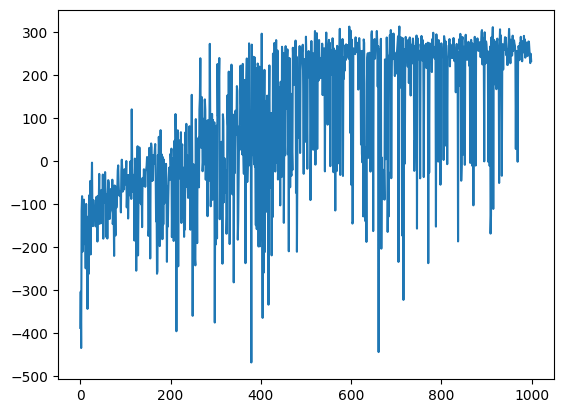

In [46]:
plt.plot(dueling_dqn_rewards)

In [49]:
# visualize performances
def select_action(state, model, epsilon=0.0):
    if random.random() < epsilon:  # Explore
        return env.action_space.sample()
    else:  # Exploit
        with torch.no_grad():
            q_values = model(state)
            action = torch.argmax(q_values).item()
        return action

def simulate(model):
    env = gym.make("LunarLander-v3", render_mode='rgb_array', enable_wind=True, wind_power=10, turbulence_power=1.0)
    state, _ = env.reset()
    state = torch.tensor(state, dtype=torch.float32).unsqueeze(0)
    
    img = plt.imshow(env.render())
    rewards = 0
    for _ in range(1000):
        img.set_data(env.render()) # just update the data
        display.display(plt.gcf())
        display.clear_output(wait=True)
        action = select_action(state, model, epsilon=0.0)  # Greedy action
        next_state, reward, terminated, truncated, _ = env.step(action)
        next_state = torch.tensor(next_state, dtype=torch.float32).unsqueeze(0)
        state = next_state
        rewards += reward
    
        if terminated or truncated:
            state, _ = env.reset()
            state = torch.tensor(state, dtype=torch.float32).unsqueeze(0)
            print(f'rewards = {rewards}')
            rewards = 0
    
    env.close()

def load_model(model_class, input_dim, output_dim, weights_path):
    """
    Reinitializes a model and loads weights from a .pth file.
    
    Parameters:
        model_class: The class of the model (e.g., DQN, DuelingDQN).
        input_dim: The input dimension for the model.
        output_dim: The output dimension for the model.
        weights_path: Path to the saved weights (.pth file).
        
    Returns:
        A model instance with loaded weights.
    """
    # Initialize the model
    model = model_class(input_dim, output_dim)
    
    # Load the saved weights
    model.load_state_dict(torch.load(weights_path))
    
    # Set the model to evaluation mode
    model.eval()
    
    return model

# Example: Reloading a DQN model
input_dim = 8  # Adjust based on your environment's observation space
output_dim = 4  # Adjust based on your environment's action space
weights_path = "weights/env_wind_0_DQN_weights.pth"  # Path to the saved weights

# Reinitialize the model
dqn_model = load_model(DQN, input_dim, output_dim, weights_path)

C:\Users\kapil\AppData\Local\Temp\ipykernel_44388\1728875872.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(weights_path))


KeyboardInterrupt: 

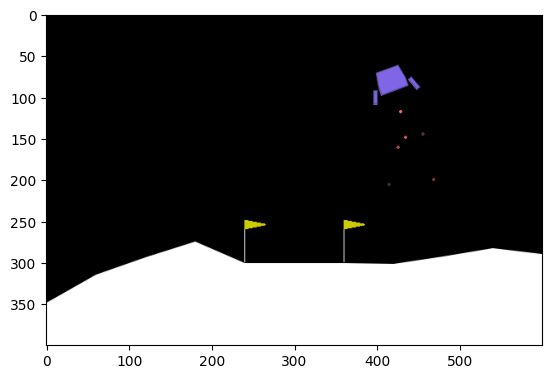

In [50]:
simulate(dqn_model)

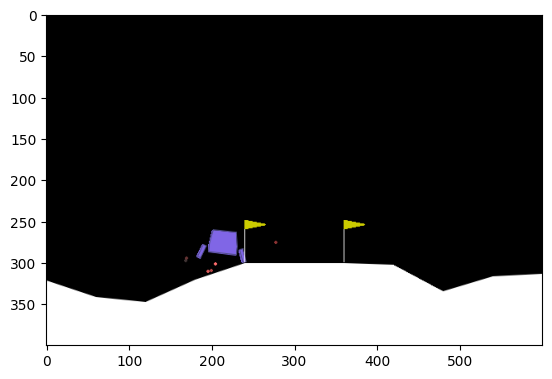

In [64]:
simulate(trained_dqn)

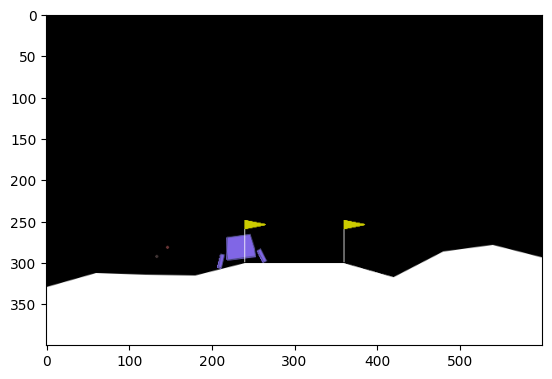

In [70]:
simulate(trained_ddqn)